In [1]:
!mvn --version

Apache Maven 3.9.6 (bc0240f3c744dd6b6ec2920b3cd08dcc295161ae)
Maven home: C:\Program Files\apache-maven-3.9.6
Java version: 22, vendor: Oracle Corporation, runtime: C:\Program Files\Java\jdk-22
Default locale: en_US, platform encoding: UTF-8
OS name: "windows 11", version: "10.0", arch: "amd64", family: "windows"


In [2]:
import imagej
ij = imagej.init('sc.fiji:fiji')

In [19]:
import os
import numpy as np
import subprocess
import glob
import pandas as pd
import spectral as spy
import imageio
import matplotlib.pyplot as plt

In [20]:
def load_cubes_im3(data_path):
    cube_files = glob.glob(os.path.join(data_path, '*.im3'))

    cubes = {}
    for filepath in cube_files:
        img = ij.io().open(filepath)
        cube = np.array(ij.py.from_java(img))
        ex = os.path.basename(filepath)[:-4]
        cube_data = {
            'num_rows': cube.shape[0],
            'num_cols': cube.shape[1],
            'num_bands': cube.shape[2],
            'ex': ex,
            'data': cube,
        }

        cubes[os.path.basename(filepath)] = cube_data

    return cubes

In [8]:
path_cubes = r"C:\Users\meloy\Desktop\cubes"

In [21]:
cb = load_cubes_im3(path_cubes)

[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\300.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\310.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\320.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\330.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\340.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\350.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\360.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\370.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\380.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\390.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Users\meloy\Desktop\cubes\400.im3
[java.lang.Enum.toString] IM3Reader initializing C:\Us

In [22]:
print(cb)

{'300.im3': {'num_rows': 520, 'num_cols': 696, 'num_bands': 31, 'ex': '300', 'data': array([[[  0,   0,   0, ...,   0,   0,   0],
        [ 50,  49,  46, ...,  66,  60,  61],
        [ 41,  39,  43, ...,  48,  57,  51],
        ...,
        [ 50,  45,  46, ...,  57,  58,  60],
        [ 42,  39,  52, ...,  52,  60,  54],
        [ 42,  44,  49, ...,  64,  58,  63]],

       [[ 43,  46,  45, ...,  60,  45,  63],
        [ 38,  41,  43, ...,  50,  50,  53],
        [ 49,  46,  49, ...,  54,  43,  45],
        ...,
        [ 44,  46,  46, ...,  64,  56,  64],
        [ 44,  45,  42, ...,  59,  62,  59],
        [ 47,  50,  41, ...,  52,  60,  61]],

       [[ 43,  44,  42, ...,  52,  53,  58],
        [ 42,  41,  50, ...,  67,  60,  58],
        [ 33,  42,  45, ...,  57,  53,  48],
        ...,
        [ 40,  38,  47, ...,  58,  60,  54],
        [ 44,  39,  38, ...,  60,  61,  55],
        [ 44,  45,  49, ...,  58,  64,  58]],

       ...,

       [[ 49,  47,  36, ...,  60,  67,  57],
  

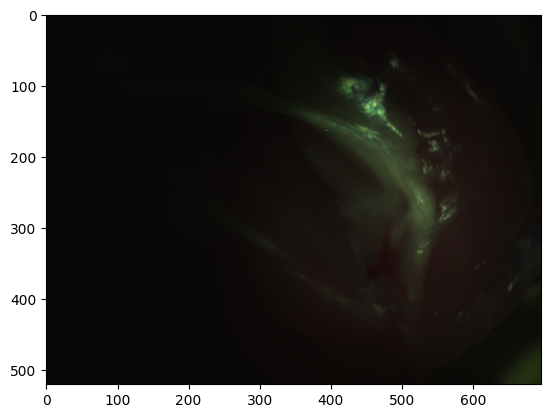

In [31]:
sample_cube = cb['300.im3']['data']
blue_bands = range(3, 9) # 450-500 nm inclusive
green_bands = range(13, 19) # 550-600 nm inclusive
red_bands = range(23, 29) # 650-700 nm inclusive

red_data = np.mean(sample_cube[:, :, red_bands], axis=-1)
green_data = np.mean(sample_cube[:, :, green_bands], axis=-1)
blue_data = np.mean(sample_cube[:, :, blue_bands], axis=-1)

normalized_red = (red_data - np.min(red_data)) / (np.max(red_data) - np.min(red_data))
normalized_green = (green_data - np.min(green_data)) / (np.max(green_data) - np.min(green_data))
normalized_blue = (blue_data - np.min(blue_data)) / (np.max(blue_data) - np.min(blue_data))

rgb_image = np.stack([normalized_red, normalized_green, normalized_blue], axis=-1)

spy.imshow(rgb_image);

ImageView object:
  Display bands       :  [0, 1, 2]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 255.0]
    G: [0.0, 255.0]
    B: [0.0, 255.0]

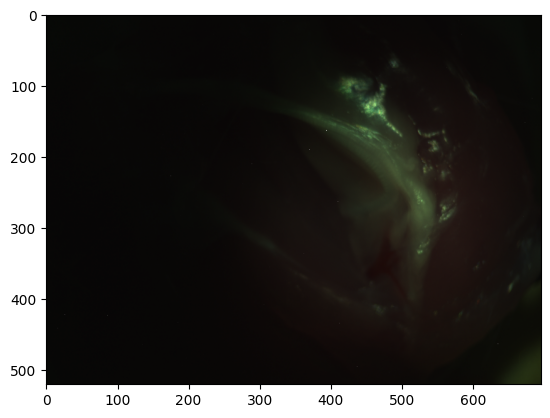

In [33]:
sample_cube = cb['300.im3']['data']

blue_bands = range(3, 9)  # 450-500 nm inclusive
green_bands = range(13, 19)  # 550-600 nm inclusive
red_bands = range(23, 29)  # 650-700 nm inclusive

red_data = np.mean(sample_cube[:, :, red_bands], axis=-1)
green_data = np.mean(sample_cube[:, :, green_bands], axis=-1)
blue_data = np.mean(sample_cube[:, :, blue_bands], axis=-1)

normalized_red = (red_data - np.min(red_data)) / (np.max(red_data) - np.min(red_data))
normalized_green = (green_data - np.min(green_data)) / (np.max(green_data) - np.min(green_data))
normalized_blue = (blue_data - np.min(blue_data)) / (np.max(blue_data) - np.min(blue_data))

rgb_image = np.stack([normalized_red, normalized_green, normalized_blue], axis=-1)

rgb_image_uint8 = (rgb_image * 255).astype(np.uint8)

output_filename = 'output_image.png'
imageio.imwrite(output_filename, rgb_image_uint8)

spy.imshow(rgb_image_uint8)

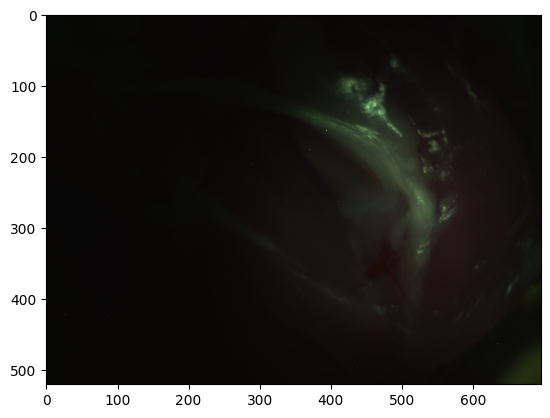

In [35]:


def combine_cubes_to_rgb(cube_list):
    blue_bands = range(3, 9)  # 450-500 nm inclusive
    green_bands = range(13, 19)  # 550-600 nm inclusive
    red_bands = range(23, 29)  # 650-700 nm inclusive

    combined_red = None
    combined_green = None
    combined_blue = None

    for cube in cube_list:
        red_data = np.mean(cube[:, :, red_bands], axis=-1)
        green_data = np.mean(cube[:, :, green_bands], axis=-1)
        blue_data = np.mean(cube[:, :, blue_bands], axis=-1)

        if combined_red is None:
            combined_red = np.zeros_like(red_data)
            combined_green = np.zeros_like(green_data)
            combined_blue = np.zeros_like(blue_data)

        combined_red += red_data
        combined_green += green_data
        combined_blue += blue_data

    normalized_red = (combined_red - np.min(combined_red)) / (np.max(combined_red) - np.min(combined_red))
    normalized_green = (combined_green - np.min(combined_green)) / (np.max(combined_green) - np.min(combined_green))
    normalized_blue = (combined_blue - np.min(combined_blue)) / (np.max(combined_blue) - np.min(combined_blue))

    rgb_image = np.stack([normalized_red, normalized_green, normalized_blue], axis=-1)

    rgb_image_uint8 = (rgb_image * 255).astype(np.uint8)

    spy.imshow(rgb_image_uint8)

    return rgb_image_uint8

rgb_image = combine_cubes_to_rgb([cb['300.im3']['data'], cb['310.im3']['data']])

output_filename = 'combined_rgb_image_2.png'
imageio.imwrite(output_filename, rgb_image)